# Naïve Bayes

Se basa en la teoría de probabilidades de bayes y en el cporncipio de independencia de las características. Para este clasificador las caracteristicas son: 

>i.i.d( Independientes e idénticamente distribuidas).

Generalmente con función de densidad de probabilidad Normal o Gaussiana. la idea de este clasificador es maximizar la probabilidad posterior, de tal forma que:

$$\omega_{predict} = \arg\max_{j=1.\dots.m}P(\omega_j|\mathbf{x}_i),$$

donde 
>$P(\omega_j\mathbf{x}_i)$ es la probabilidad posterior, esto es:

>> La probabilidad de encontrar una etiqueta de clase $\omega_j$ dado un conjunto de patrones $\mathbf{x}_i$;
$\omega_{predict}$ es la etiqueta de clase determinada por el clasificador.

La probabilidad posterior está dada por:

$$P(\omega_j|\mathbf{x}_i)=\frac{P(\mathbf{x}_i|\omega_j)P(\omega_j)}{P(\mathbf{x}_i)},$$

con $P(\mathbf{x}_i|\omega_j)=\prod_{k=1,\ldots,p}P(x_{ik}|\omega_j$ la verosimilitud, $P(\mathbf{x}_i)$
la evidencia y $P(\omega_j)$ la probabilidad prior o *a priori*

Para la implementación tenemos que: 


In [19]:
# importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB #importar libreria del clasificador 
from sklearn import cross_validation #Libreria para las utilidades de conjunto de 

# para graficar las muestras
def vizualizar_clasificador(clasificador,X,y):
    #definimos valores maximos y minimos de la malla que vamos a graficar
    min_x,max_x = X[:,0].min()-1.0, X[:,0].max()+1.0
    min_y,max_y = X[:,1].min()-1.0, X[:,1].max()+1.0
    
    #definir el paso de la malla
    paso = 0.01
    
    #definimos la malla
    x_vals,y_vals =np.mgrid[min_x:max_x:paso, min_y:max_y:paso]
    
    #np.c: para concatenar los valores
    #np.ravel: coloca todos los datos de varios arreglos o varias dimensiones en 1 sola
    
    #corremos el clasificador sobre la malla
    resultados = clasificador.predict(np.c_[x_vals.ravel(),y_vals.ravel()])
    # reordenamos la salida para que nos quede en forma de malla
    resultados = resultados.reshape(x_vals.shape)
    
    #creamos la figura 
    plt.figure()
    # Elegimos la paleta de colores(colormap)
    plt.pcolormesh(x_vals,y_vals, resultados, cmap=plt.cm.Pastel1)
    
    #Ubicamos los puntos a clasificar
    # X[:,0] es la coordenada en el eje x
    # X[:,1] es la coordenada y
    # c(color) define el color (c=etiquetas)
    # s = es el tamaño de la letra(size)
    # edgcolors = define el borde
    # linewidth = define el ancho de las lineas
    # cmap = define el mapa de color
    plt.scatter(X[:,0],X[:,1],c=y,s=75, edgecolors='black',linewidth=1,cmap=plt.cm.Set3)
    
    #fijamos los limites para los ejes x e y
    plt.xlim(x_vals.min(),x_vals.max())
    plt.ylim(y_vals.min(),y_vals.max())
    
    #Mostramos la grafica
    plt.show()
    



El acc del clasificador es del  76.6666666667 %


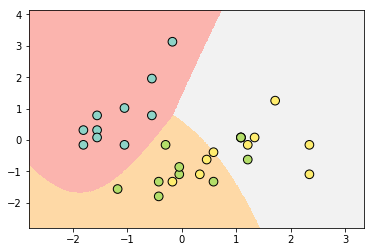

In [36]:
# importamos los datos desde el archivo o de texto plano separao por comas
#archivo_entrada = 'Datos.txt' #nombre del archivo
#datos = np.loadtxt(archivo_entrada,delimiter=',') #cargamos los datos en la variable "datos"
#X,y =datos[:,:-1],datos[:,-1]

from sklearn import datasets
iris = datasets.load_iris()   #Se carga la base de datos
X = iris.data[:,[0,1]]        #La matriz de datos (solo se toman 2 carac. para la visualización)
y = iris.target               #las etiquetas

X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size=0.2,random_state=3)

#Remoción para x_train
def Remocion(X):
    med = X.mean(axis=0)
    des = X.std(axis=0)
    X = X - med
    X = X/des
    return X,med, des

#Remocion para x_test
def Remocion_test(X,med,des):
    X = X - med
    X = X/des
    return X


#nomralizacion de x_train
x_norm_train,t_train_mean,t_train_desv = Remocion(X_train)
#Normalizacion para x_test
x_norm_test = Remocion_test(X_test,t_train_mean,t_train_desv)


#generar el clasificador
clasificador = GaussianNB() #instanciamos y luego entrenamos
clasificador.fit(x_norm_train, y_train) #entrenamos el clasificador


#hacer la predicion
y_predict = clasificador.predict(x_norm_test)
acc = 100.0*(y_predict == y_test).sum()/x_norm_test.shape[0] #para calcular el acierto del clasificador
print('El acc del clasificador es del ',acc, '%')
vizualizar_clasificador(clasificador,x_norm_test,y_test)

[0 1 2]
